# Motor DC
Dadas las ecuaciones del motor de corriente continua con torque de carga $ T_L $ no nulo, con los parámetros

$ LAA=366e10-6; J=5e10-9; RA=55,6; B=0; Ki= 6,49e10-3 ; Km= 6,53e10-3 $

Modelado por las siguientes Ecuaciones diferenciales:

$\frac{di_a}{dt}=\frac{R_A}{L_{AA}}ia-\frac{K_m}{L_{AA}}\omega _r+\frac{1}{L_{AA}}Va $

$ \frac{d\omega_r}{dt}=\frac{K_i}{J}ia-\frac{B_m}{J}\omega _r+\frac{1}{J}T_L $

$ \frac{d\theta _t}{dt}=\omega _r $


En primer lugar, haciendo uso de integracion por euler con el paso fijado integramos para inferir el comportamiento de nuestras variables de interes

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control as ct
from control.matlab import *
import cmath as cm
from math import log

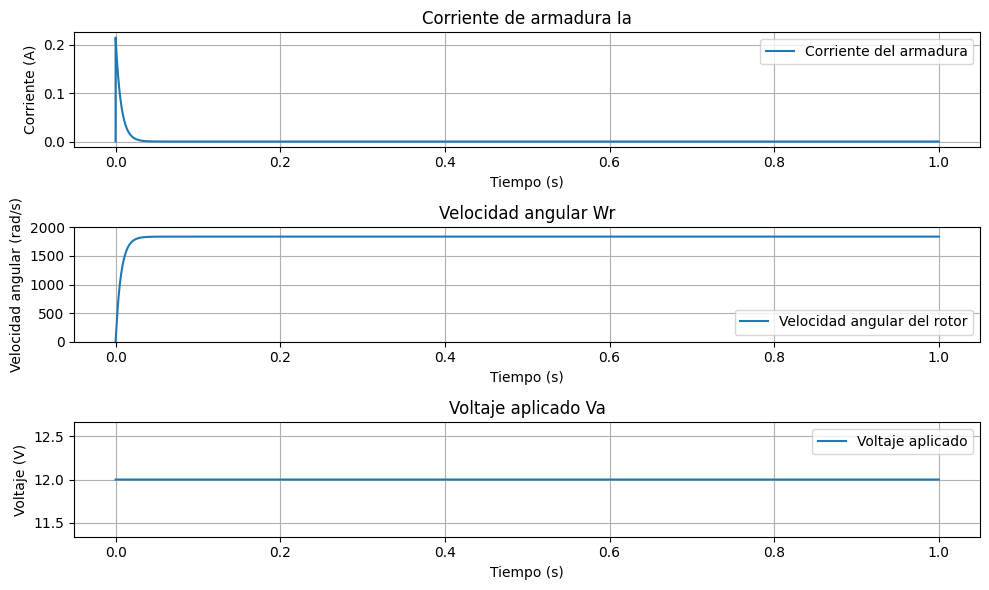

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los parámetros del sistema
R_A = 55.6
L_AA = 366e-6
K_m = 6.53e-3
J = 5e-9
B_m = 0
K_i = 6.49e-3

# Definir las matrices A, B, C y D del sistema de espacio de estados
A = np.array([[-R_A/L_AA, -K_m/L_AA],
              [K_i/J, -B_m/J]])
B = np.array([[1/L_AA], [0]])
C = np.array([[1, 0],
              [0, 1]])
D = np.array([[0], [0]])

# Definir la función que calcula la derivada del estado
def derivada_estado(x, u):
    return np.dot(A, x) + np.dot(B, u)

# Definir la función que calcula la salida
def salida(x, u):
    return np.dot(C, x) + np.dot(D, u)

# Definir el tiempo de simulación y el paso de tiempo
tiempo_simulacion = 1.0
delta_t = 10e-7

# Inicializar las variables del sistema
x = np.array([[0], [0]])  # Condiciones iniciales nulas
u = np.array([[12]])      # Voltaje aplicado

# Almacenar resultados de la simulación
tiempos = [0]
corriente_armadura = [x[0, 0]]
velocidad_angular = [x[1, 0]]
voltaje = [u[0, 0]]

# Realizar la simulación mediante el método de Euler
t = 0.0
while t < tiempo_simulacion:
    # Calcular el siguiente estado utilizando el método de Euler
    x = x + derivada_estado(x, u) * delta_t
    
    # Calcular la salida
    y = salida(x, u)
    
    # Almacenar los resultados
    t += delta_t
    tiempos.append(t)
    corriente_armadura.append(y[0, 0])
    velocidad_angular.append(y[1, 0])
    voltaje.append(u[0, 0])

# Graficar las variables de interés
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(tiempos, corriente_armadura, label='Corriente del armadura')
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (A)')
plt.title('Corriente de armadura Ia')
plt.legend()
plt.grid()


plt.subplot(3, 1, 2)
plt.plot(tiempos, velocidad_angular, label='Velocidad angular del rotor')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad angular (rad/s)')
plt.title('Velocidad angular Wr')
y_min = min(velocidad_angular)
plt.ylim(y_min, 2000)
plt.legend()
plt.grid()


plt.subplot(3, 1, 3)
plt.plot(tiempos, voltaje, label='Voltaje aplicado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.title('Voltaje aplicado Va')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# Ítem [4] 
Obtener el torque máximo que puede soportar el motor modelado mediante las Ec cuando se lo alimenta con 12V, graficando para 5 segundos de tiempo la velocidad angular y corriente ia para establecer su valor máximo como para dimensionar dispositivos electrónicos.

Para ello podemos  determinarlo a partir de el pico de corriente obtenido a partir de las graficas. Y reemplazar ese valor en la ecuacion

$ T= K_m i_a $

In [30]:
max_Ia = np.max(corriente_armadura)
max_Ia = round(max_Ia, 4)  # Redondear a 4 decimales
print('El valor maximo de la corriente de armadura es de:')
print(max_Ia)

T= K_m*max_Ia
T = round(T, 4)  # Redondear a 4 decimales
print('El valor maximo del torque es de:')
print(T)

El valor maximo de la corriente de armadura es de:
0.2147
El valor maximo del torque es de:
0.0014


El valor maximo de torque que puede soportar el motor para las condiciones dadas es $ 1.41 e-3 N_m $

# Ítem [5] 
A partir de las curvas de mediciones de las variables graficadas se requiere
obtener el modelo del sistema considerando como entrada un escalón de 12V, como salida a la
velocidad angular, y al torque de carga TL aplicado una perturbación. 

En el archivo Curvas_Medidas_Motor.xls están las mediciones, en la primer hoja los valores y en la segunda
los nombres. Se requiere obtener el modelo dinámico, para establecer las constantes del modelo


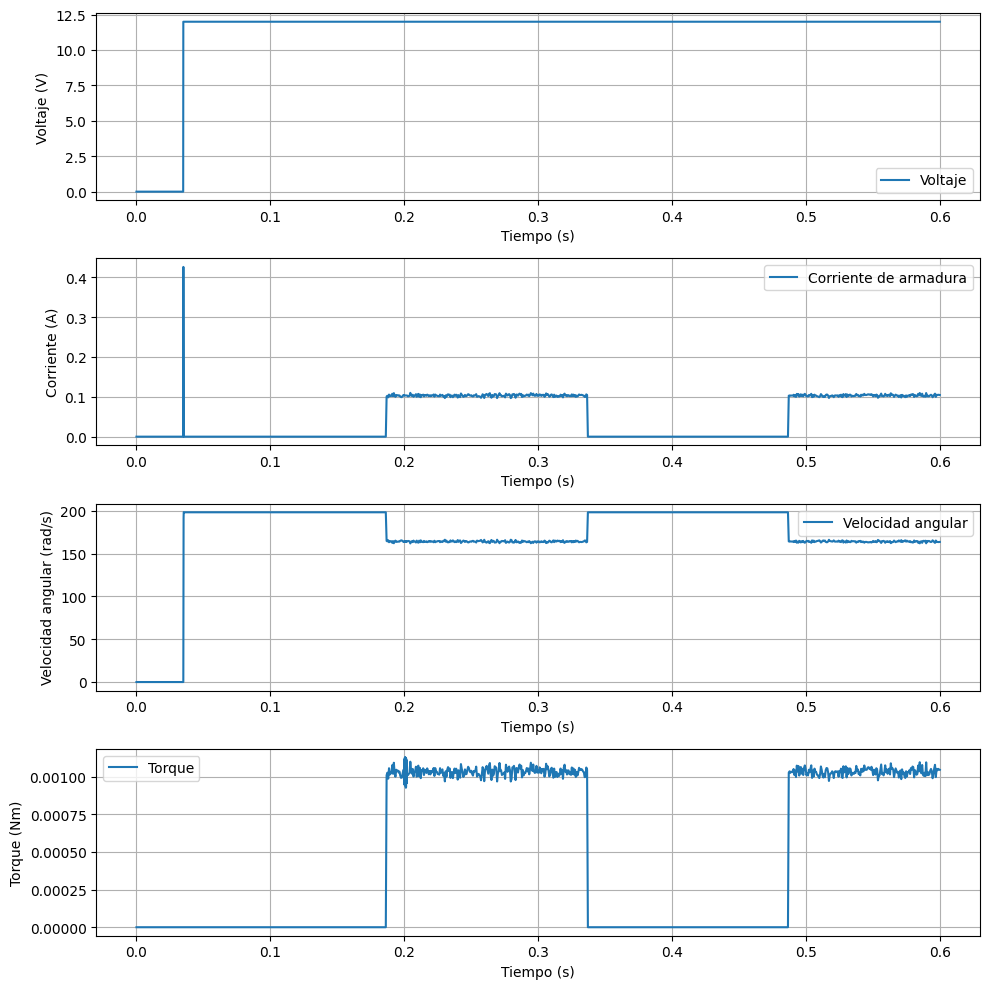

In [31]:
import plotly.graph_objects as go


df= pd.read_excel('Curvas_Medidas_Motor_2024.xls') # extraigo datos de xls
t = df.iloc[:, 0] #selecciono primera columna y todas sus filas, guardo como variable t
W_r = df.iloc[:, 1]
i_a = df.iloc[:, 2]
v=df.iloc[:, 3]
T= df.iloc[:, 4]

# Crear una figura y un conjunto de subtramas
fig, axs = plt.subplots(4, figsize=(10, 10))

# Graficar voltaje en función del tiempo
axs[0].plot(t, v, label='Voltaje')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Voltaje (V)')
axs[0].legend()
axs[0].grid()

# Graficar corriente de armadura en función del tiempo
axs[1].plot(t, i_a, label='Corriente de armadura')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Corriente (A)')
axs[1].legend()
axs[1].grid()

# Graficar velocidad angular en función del tiempo
axs[2].plot(t, W_r, label='Velocidad angular')
axs[2].set_xlabel('Tiempo (s)')
axs[2].set_ylabel('Velocidad angular (rad/s)')
axs[2].legend()
axs[2].grid()

# Graficar torque en función del tiempo
axs[3].plot(t, T, label='Torque')
axs[3].set_xlabel('Tiempo (s)')
axs[3].set_ylabel('Torque (Nm)')
axs[3].legend()
axs[3].grid()

# Ajustar el layout
plt.tight_layout()
plt.show()



In [32]:
#Graficos interactivos
# Crear gráficos
fig1 = go.Figure(data=go.Scatter(x=t, y=v, mode='lines', name='Voltaje'))
fig2 = go.Figure(data=go.Scatter(x=t, y=i_a, mode='lines', name='Corriente de armadura'))
fig3 = go.Figure(data=go.Scatter(x=t, y=W_r, mode='lines', name='Velocidad angular'))
fig4 = go.Figure(data=go.Scatter(x=t, y=T, mode='lines', name='Torque'))

# Configurar los títulos de los ejes
fig1.update_layout(xaxis_title='Tiempo (s)', yaxis_title='Voltaje (V)')
fig2.update_layout(xaxis_title='Tiempo (s)', yaxis_title='Corriente (A)')
fig3.update_layout(xaxis_title='Tiempo (s)', yaxis_title='Velocidad angular (rad/s)')
fig4.update_layout(xaxis_title='Tiempo (s)', yaxis_title='Torque (Nm)')

# Mostrar los gráficos
fig1.show()
fig2.show()
fig3.show()
fig4.show()

Nuevamente para obtener una funcion de transferencia que relacione la velocidad angular como salida y la tension de Vin como la entrada junto con sus constantes escalares , utilizaremos el metodo de chen previamente usado,considerando como entrada un escalón de 12V, como salida a la velocidad angular, y al torque de carga TL aplicado una perturbación.

Con ayuda de los valores del excel y curvas graficadas definimos las variables




In [82]:
yt_1 =135.583968726574
yt_2 =191.604441793493  
yt_3 =198.304639094699


#yt1 =135.583968726574
#yt2 =191.604441793493  
#yt3 =198.304639094699
#yt_1 =yt1/12
#yt_2 =yt2/12 
#yt_3 =yt3/12  

K=198
#K = Kp/12


k_1 = (yt_1 / K) - 1
k_2 = (yt_2 / K) - 1
k_3 = (yt_3 / K) - 1

print('k_1: {:.2e}'.format(k_1))
print('k_2: {:.2e}'.format(k_2))
print('k_3: {:.2e}'.format(k_3))

k_1: -3.15e-01
k_2: -3.23e-02
k_3: 1.54e-03


In [83]:
import cmath
be = 4 * (k_1**3) * k_3 - 3 * (k_1**2) * (k_2**2) - 4 * (k_2**3) + (k_3**2) + 6 * k_1 * k_2 * k_3

if be > 0: #Cambiar el cálculo para usar números complejos - Extraido Collab
  alpha_1=(k_1*k_2+k_3-np.sqrt(be))/(2*(k_1**2+k_2))
  alpha_2=(k_1*k_2+k_3+np.sqrt(be))/(2*(k_1**2+k_2))
else :
  alpha_1=(k_1*k_2+k_3-cm.sqrt(be))/(2*(k_1**2+k_2))
  alpha_2=(k_1*k_2+k_3+cm.sqrt(be))/(2*(k_1**2+k_2))

#alpha_1 = (k_1 * k_2 + k_3 - np.sqrt(be)) / (2 * (k_1**2 + k_2))
#alpha_2 = (k_1 * k_2 + k_3 + np.sqrt(be)) / (2 * (k_1**2 + k_2))
#beta = (2 * k_1**3 + 3 * k_1 * k_2 + k_3 - np.sqrt(be)) / (np.sqrt(be))

beta=(k_1+alpha_2)/(alpha_1-alpha_2)

print('be: {:.2e}'.format(be))
print('alpha_1: {:.2e}'.format(alpha_1))
print('alpha_2: {:.2e}'.format(alpha_2))
print('beta: {:.2e}'.format(beta))

be: -2.73e-04
alpha_1: 8.74e-02-1.23e-01j
alpha_2: 8.74e-02+1.23e-01j
beta: -5.00e-01-9.26e-01j


In [84]:
t_1 = 100e-6
T_1 = -t_1 / np.log(alpha_1)
T_2 = -t_1 / np.log(alpha_2)
T_3 = beta * (T_1 - T_2) + T_1

print('T_1: {:.2e}'.format(T_1))
print('T_2: {:.2e}'.format(T_2))
print('T_3: {:.2e}'.format(T_3))

T_1: 4.22e-05-2.13e-05j
T_2: 4.22e-05+2.13e-05j
T_3: 2.81e-06+0.00e+00j


<TransferFunction>: sys[68]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


             198
------------------------------
2.23e-09 s^2 + 8.433e-05 s + 1



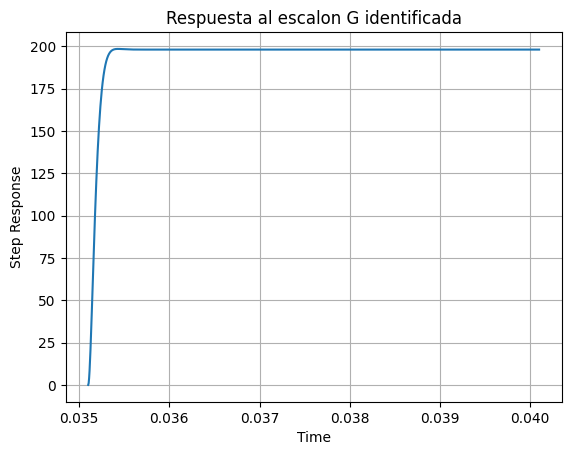

In [91]:
t_s= np.linspace(0, 0.005, 1000)

# Crear la función de transferencia utilizando control.tf()#
sys_G = K*ct.tf([0, 1],np.convolve([T_1, 1],[T_2, 1]))


# Calcular la respuesta al escalón del sistema identificado#
y_id , t_id = step(1*sys_G, t_s)

# Agregar un retraso a la respuesta al escalón
delay = 0.0351  # Retraso en segundos
t_id_delayed = t_id + delay

print(sys_G)
plt.plot(t_id_delayed, y_id)

plt.xlabel('Time')
plt.ylabel('Step Response')
plt.title('Respuesta al escalon G identificada')
plt.grid(True)
plt.show()

Al comparar esta respuesta identificada con la que obtuvimos partiendo de los valores del excel.


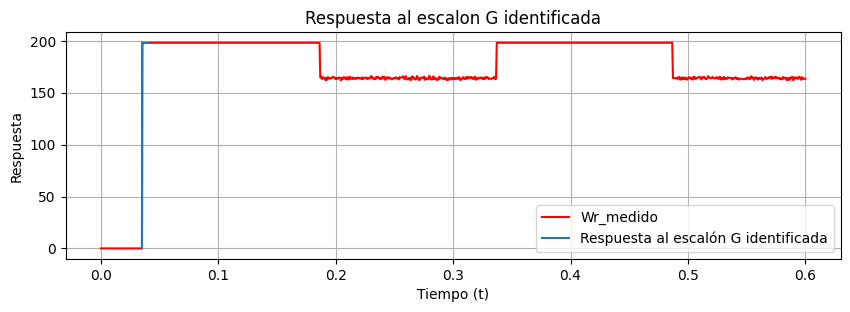

In [92]:
# Graficar Vc_t
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 2)
plt.plot(t, W_r, 'r-', label='Wr_medido')

# Graficar la respuesta al escalón del sistema identificado en el mismo gráfico
plt.plot(t_id_delayed, y_id, label='Respuesta al escalón G identificada')

# Configurar los títulos de los ejes y la leyenda
plt.xlabel('Tiempo (t)')
plt.ylabel('Respuesta')
plt.title('Respuesta al escalon G identificada')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [93]:
import plotly.graph_objects as go

# Crear una figura
fig = go.Figure()

# Agregar la traza de Wr_medido
fig.add_trace(go.Scatter(x=t, y=W_r, mode='lines', name='Wr_medido'))

# Agregar la traza de la respuesta al escalón G identificada
fig.add_trace(go.Scatter(x=t_id_delayed, y=y_id, mode='lines', name='Respuesta al escalón G identificada'))

# Configurar los títulos de los ejes y la leyenda
fig.update_layout(
    title='Respuesta al escalon G identificada',
    xaxis_title='Tiempo (t)',
    yaxis_title='Respuesta',
    legend_title='Leyenda',
    autosize=False,
    width=800,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    )

# Mostrar el gráfico
fig.show()

# Ítem [6] 
Implementar un PID en tiempo discreto para que el ángulo del motor permanezca en una
referencia de 1radian sometido al torque descripto en la Fig. 1-3. (Tip: partir de KP=0,1;
Ki=0,01; KD=5).